# Week 3 Project

### This notebook is for the capstone data science project

For the Toronto neighborhood data, a Wikipedia page exists that has all the information we need to explore and cluster the neighborhoods in Toronto. You will be required to scrape the Wikipedia page and wrangle the data, clean it, and then read it into a pandas dataframe so that it is in a structured format like the New York dataset.

Once the data is in a structured format, you can replicate the analysis that we did to the New York City dataset to explore and cluster the neighborhoods in the city of Toronto.

Your submission will be a link to your Jupyter Notebook on your Github repository.

Start by creating a new Notebook for this assignment.
Use the Notebook to build the code to scrape the following Wikipedia page, https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M, in order to obtain the data that is in the table of postal codes and to transform the data into a pandas dataframe like the one shown below:

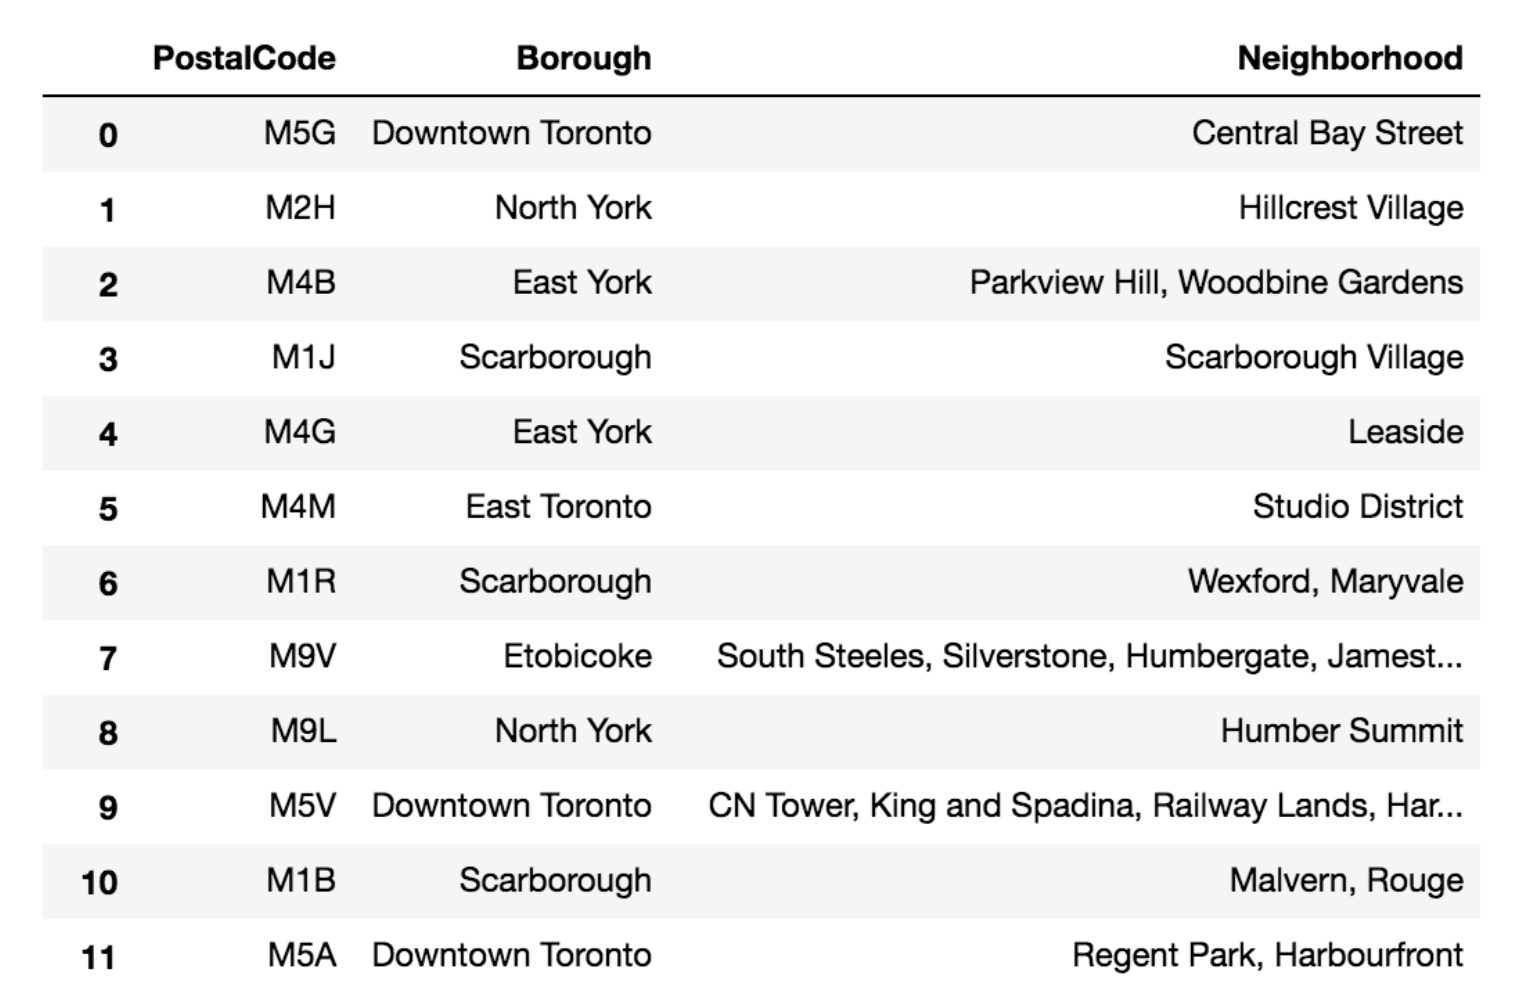

3. To create the above dataframe:

The dataframe will consist of three columns: PostalCode, Borough, and Neighborhood
Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.
More than one neighborhood can exist in one postal code area. For example, in the table on the Wikipedia page, you will notice that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. These two rows will be combined into one row with the neighborhoods separated with a comma as shown in row 11 in the above table.
If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough.
Clean your Notebook and add Markdown cells to explain your work and any assumptions you are making.
In the last cell of your notebook, use the .shape method to print the number of rows of your dataframe.
4. Submit a link to your Notebook on your Github repository. (10 marks)

Note: There are different website scraping libraries and packages in Python. For scraping the above table, you can simply use pandas to read the table into a pandas dataframe.

Another way, which would help to learn for more complicated cases of web scraping is using the BeautifulSoup package. Here is the package's main documentation page: http://beautiful-soup-4.readthedocs.io/en/latest/

The package is so popular that there is a plethora of tutorials and examples on how to use it. Here is a very good Youtube video on how to use the BeautifulSoup package: https://www.youtube.com/watch?v=ng2o98k983k

Use pandas, or the BeautifulSoup package, or any other way you are comfortable with to transform the data in the table on the Wikipedia page into the above pandas dataframe.

In [1]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # library for data analsysis

In [ ]:
# import numpy as np  # useful for many scientific computing in Python
# import pandas as pd # library for data analsysis
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

# import json # library to handle JSON files

# !conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
# from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# import requests # library to handle requests
# from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# # Matplotlib and associated plotting modules
# import matplotlib.cm as cm
# import matplotlib.colors as colors

# # import k-means from clustering stage
# from sklearn.cluster import KMeans

# #!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
# import folium # map rendering library

# print('Libraries imported.')

### Scraping website using a Beautiful Soup Library

In [2]:
from urllib.request import urlopen
from bs4 import BeautifulSoup as bs

In [ ]:
#!conda install -c anaconda lxml

Basic Tutorial: https://www.datacamp.com/community/tutorials/web-scraping-using-python

You can use the find_all() method of soup to extract useful html tags within a webpage. Examples of useful tags include < a > for hyperlinks, < table > for tables, < tr > for table rows, < th > for table headers, and < td > for table cells. The code below shows how to extract all the hyperlinks within the webpage.

In [3]:
import urllib.request

In [4]:
#scrape website for toronto housing data using beautiful soup library
td=[]
sauce=urllib.request.urlopen('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')
soup=bs(sauce,'lxml')
TO_table=soup.find('table')
table_rows=TO_table.find_all('tr')

### Save data from Wikipedia to dataframe

In [5]:
#Save data from website into dataframe called "frame"
l=[]
for tr in table_rows:
    td = tr.find_all('td')
    row = [tr.text for tr in td]
    l.append(row)
frame=pd.DataFrame(l, columns=["Postal Code", "Borough", "Neighbourhood"])

### Clean up dataframe

In [7]:
#delete \n from elements in table
frame['Postal Code']=frame['Postal Code'].str.strip('\n')
frame['Borough']=frame['Borough'].str.strip('\n')
frame['Neighbourhood']=frame['Neighbourhood'].str.strip('\n')

In [13]:
# checking to see if there are any boroughs identified but an unidentified neighbourhood
print(frame[frame.Neighbourhood==""].count())
print(frame[frame.Borough=="Not assigned"].count())

Postal Code      77
Borough          77
Neighbourhood    77
dtype: int64
Postal Code      77
Borough          77
Neighbourhood    77
dtype: int64


In [14]:
#neighbourhood & borough unidentified match so can delete rows with unassigned in neighbourhood column
#delete entries that are "not assigned"
frame['Neighbourhood'].replace('', np.nan, inplace=True) #replaces blank strings with NaN so I can perform next step 
frame.dropna(axis=0,how='any',inplace=True) #deletes rows where the neighbourhood had a value of "NaN" - which corresponded to a "not assigned" borough


In [16]:
# Re-setting index so it is easier to call via index if necessary
frame.reset_index(drop=True, inplace=True)

In [21]:
#Replace backslashes in Neighbourhood column with comma's (as per the instructions)
frame=frame.apply(lambda x: x.str.replace('/',','))

In [23]:
frame.head(12)

,Postal Code,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park , Harbourfront"
3,M6A,North York,"Lawrence Manor , Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park , Ontario Provincial Government"
5,M9A,Etobicoke,Islington Avenue
6,M1B,Scarborough,"Malvern , Rouge"
7,M3B,North York,Don Mills
8,M4B,East York,"Parkview Hill , Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


In [24]:
frame.shape

(103, 3)